__Анализ бизнес-показателей (LTV, ROI, Conversion, Retention)__

### Описание проекта

Есть данные о пользователях развлекательного приложения, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

### Цель исследования

На основании данных о заходах пользователей в приложение, истории их покупок и рекламных расходах выяснить причины, по которым компания терпит убытки и предложить пути оптимизации маркетинговой стратегии.

### Описание данных

Структура visits_info_short.csv:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура orders_info_short.csv:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура costs_info_short.csv:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### В рамках исследования необходимо:

__1. Загрузить данные и подготовить их к анализу:__
- Изучить данные
- Проверить наличие пропусков и дубликатов
- Изменить типы данных при необходимости

__2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.__

__3. Провести исследовательский анализ данных:__
- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. - Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

__4. Маркетинг:__
- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

__5. Оценить окупаемость рекламы:__
- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
 *  Окупается ли реклама, направленная на привлечение пользователей в целом?
 *  Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
 *  Чем могут быть вызваны проблемы окупаемости?
 
__6. Выделить причины неэффективности привлечения пользователей и сформулировать рекомендации для отдела маркетинга.__

### Загрузка данных и подготовка к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# загружаем данные из csv файлов в переменные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# посмотрим какие данные в этих датафреймах
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
# приведем названия колонок к единому стилю
def get_col_names(data):
    return [column.replace(' ', '_').lower() for column in data.columns]

visits.columns = get_col_names(visits)
orders.columns = get_col_names(orders)
costs.columns = get_col_names(costs)

In [5]:
# изучим типы данных
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [6]:
# изменим типы данных в колонках с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
# проверим наличие пропусков в датафреймах
display(visits.isna().mean())
display(orders.isna().mean())
display(costs.isna().mean())

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

dt         0.0
channel    0.0
costs      0.0
dtype: float64

In [8]:
# и проверим наличие явных дубликатов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

__Пропусков и дубликатов нет. Типы данных в колонках с датами изменены__

In [9]:
# проверим временные интервалы заходов пользователей
# дата и время конца сессии не должна быть раньше ее начала
(visits['session_end'] >= visits['session_start']).value_counts()

True    309901
dtype: int64

в датах ошибок нет

In [10]:
# посмотрим диапазоны дат в представленных данных
display(visits['session_start'].min())
display(visits['session_start'].max())

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

In [11]:
display(orders['event_dt'].min())
display(orders['event_dt'].max())

Timestamp('2019-05-01 00:28:11')

Timestamp('2019-10-31 23:56:56')

In [12]:
display(costs['dt'].min())
display(costs['dt'].max())

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Представлены данные с мая по октябрь 2019 года (как и заявлено). Данные о зарегистрированных уникальных пользователях проверим на стадии исследовательского анализа.

In [13]:
# проверим покупки пользователей (ознакомимся с тарифами приложения) и убедимся, что нет аномалий/ошибок
orders.revenue.value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [14]:
# и проверим расходы на рекламу
costs.costs.describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

аномалий не выявлено

### Функции для расчёта и анализа LTV, ROI, Retention и Conversion

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
# функция создания профилей пользователей
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [16]:
# функция для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [19]:
# функция для сглаживания данных (скользящие средние)
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

In [23]:
# с помощью функции получим профили пользователей с информацией о дате и времени первого захода в приложение,
# канале привлечения, устройстве, регионе, совершил ли покупку пользователь и CAC (стоимость привлечения пользователя)
users = get_profiles(visits, orders, costs)
users

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-28 08:33:02,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-21 00:35:17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-23 02:57:06,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-28 21:28:09,False,0.205714


In [24]:
# минимальная дата привлечения
users['dt'].min()

datetime.date(2019, 5, 1)

In [25]:
# максимальная дата привлечения
users['dt'].max()

datetime.date(2019, 10, 27)

Ранее мы выяснили, что пользователи заходили в приложение и совершали покупки с 1 мая до 31 октября 2019 года. Однако данные представлены по пользователям, зарегистрированным с 1 мая по 27 октября (в соответствии с ТЗ).

In [26]:
# посмотрим из каких стран приходят пользователи и доли платящих
users_by_region = users.groupby(['region']).agg({'user_id': 'count', 'payer':'sum'})
users_by_region.columns = ['total_users', 'payers']
users_by_region['percent_of_payers'] = round((users_by_region['payers'] / users_by_region['total_users']) * 100, 1)
users_by_region.sort_values('percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
region,,,
United States,100002,6902,6.9
Germany,14981,616,4.1
UK,17575,700,4.0
France,17450,663,3.8


Больше всего платящих пользователей приходит в приложение из США, их доля составляет 6.9%, меньше всего платящих пользователей во Франции (всего 3.8%)

In [27]:
# Посмотрим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
users_by_device = users.groupby(['device']).agg({'user_id': 'count', 'payer':'sum'})
users_by_device.columns = ['total_users', 'payers']
users_by_device['percent_of_payers'] = round((users_by_device['payers'] / users_by_device['total_users']) * 100, 1)
users_by_device.sort_values('percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
device,,,
Mac,30042,1912,6.4
iPhone,54479,3382,6.2
Android,35032,2050,5.9
PC,30455,1537,5.0


Наибольшая доля совершивших покупки пользователей принадлежит устройствам Mac и iPhone (6.4% и 6.2%). Пользователи PC совершили покупку только в 5% случаев.

In [28]:
users_by_channel = users.groupby(['channel']).agg({'user_id': 'count', 'payer':'sum'})
users_by_channel.columns = ['total_users', 'payers']
users_by_channel['percent_of_payers'] = round((users_by_channel['payers'] / users_by_channel['total_users']) * 100, 1)
users_by_channel.sort_values('percent_of_payers', ascending=False)

,total_users,payers,percent_of_payers
channel,,,
FaceBoom,29144,3557,12.2
AdNonSense,3880,440,11.3
lambdaMediaAds,2149,225,10.5
TipTop,19561,1878,9.6
RocketSuperAds,4448,352,7.9
WahooNetBanner,8553,453,5.3
YRabbit,4312,165,3.8
MediaTornado,4364,156,3.6
LeapBob,8553,262,3.1


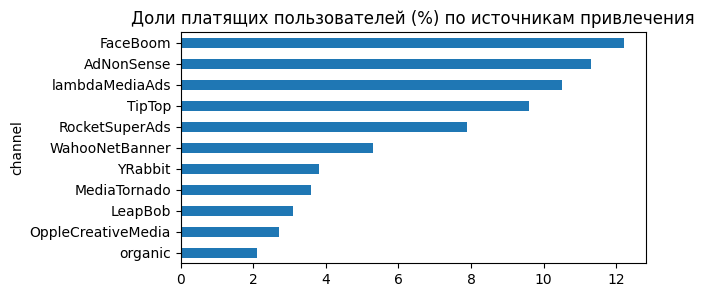

In [29]:
users_by_channel['percent_of_payers'].sort_values().plot(kind='barh', figsize=(6,3))
plt.title('Доли платящих пользователей (%) по источникам привлечения');

* Среди источников привлечения наибольшую долю платящих пользователей имеет FaceBoom 12.2%.
* Источники из Топ-3 имеют доли платящих пользователей больше 10%.
* Худший показатель у бесплатных пользователей (organic - 2.1%), что вполне логично.

__Таким образом:__
* Среди регионов наибольшая доля платящих пользователей в США (6.9%).
* Наибольшая доля совершивших покупки пользователей принадлежит устройствам Mac и iPhone (6.4% и 6.2%)
* Среди источников привлечения наибольшую долю платящих пользователей имеет FaceBoom 12.2%.

### Маркетинг

In [30]:
# общий рекламные бюджет за период
round(costs.costs.sum(),2)

105497.3

In [31]:
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [32]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Подавляющая часть рекламного бюджета была направлена на 2 источника - TipTop, FaceBoom.

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [33]:
# добавим колонки, 'разметим' даты по месяцам и неделям
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

In [34]:
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,2019-04-25
1,2019-05-02,FaceBoom,78.1,2019-05-01,2019-05-02
2,2019-05-03,FaceBoom,85.8,2019-05-01,2019-05-02
3,2019-05-04,FaceBoom,136.4,2019-05-01,2019-05-02
4,2019-05-05,FaceBoom,122.1,2019-05-01,2019-05-02
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-01,2019-10-17
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-01,2019-10-24
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-01,2019-10-24
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-01,2019-10-24


In [35]:
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,2019-04-25
1,2019-05-02,FaceBoom,78.1,2019-05-01,2019-05-02
2,2019-05-03,FaceBoom,85.8,2019-05-01,2019-05-02
3,2019-05-04,FaceBoom,136.4,2019-05-01,2019-05-02
4,2019-05-05,FaceBoom,122.1,2019-05-01,2019-05-02
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-01,2019-10-17
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-01,2019-10-24
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-01,2019-10-24
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-01,2019-10-24


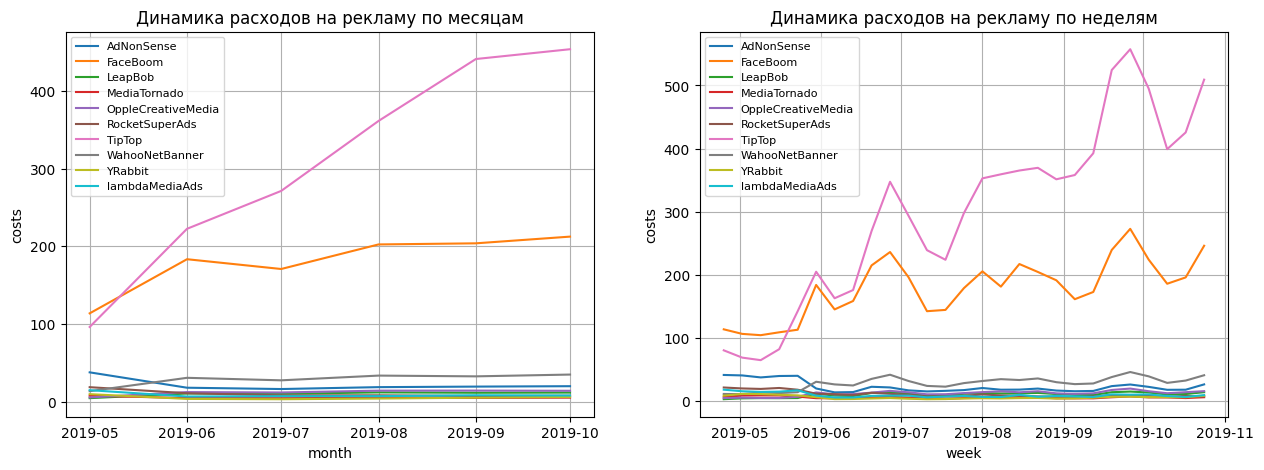

In [36]:
# построим график динамики изменения расходов на каждый источник привлечения по месяцам и неделям
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)

sns.lineplot(data=costs.groupby(['channel', 'month']).agg({'costs':'mean'}), x='month', y='costs', hue='channel', ax=ax1)
plt.grid()
plt.legend(fontsize=8)
plt.title('Динамика расходов на рекламу по месяцам');

# построим график динамики изменения расходов по источникам привлечения
ax2 = plt.subplot(1, 2, 2)

sns.lineplot(data=costs.groupby(['channel', 'week']).agg({'costs':'mean'}), x='week', y='costs', hue='channel', ax=ax2)
plt.grid()
plt.legend(fontsize=8)
plt.title('Динамика расходов на рекламу по неделям');

На графике видим, что расходы на рекламу в 2 источниках (TipTop и FaceBoom) имеют восходящий тренд: за период с мая по октябрь 2019 года расходы на TipTop выросли в 5 раз, а в FaceBoom в 2,5 раза. Бюджеты остальных источников в течение периода существенно не менялись и не превышали 50.

In [37]:
# Посмотрим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
cac_by_channel = users.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values('acquisition_cost', ascending=False)
cac_by_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


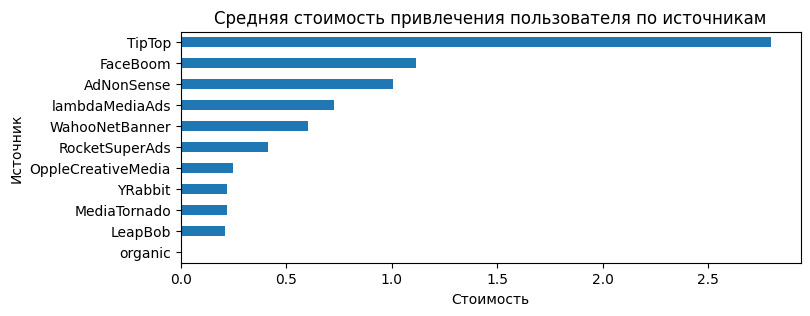

In [38]:
# построим график и сравним CAC по источникам
cac_by_channel.sort_values('acquisition_cost').plot(kind='barh', legend=False, figsize=(8, 3))
plt.title('Средняя стоимость привлечения пользователя по источникам')
plt.xlabel('Стоимость')
plt.ylabel('Источник');

Самые дорогие пользователи приходят из TipTop (2.8) и FaceBoom (1.1) - те самые источники, на которые распределена большая часть бюджета и по которым в течение периода была динамика на увеличение расходов.

In [39]:
# посмотрим среднюю стоимость привлечения пользователя
# users.acquisition_cost.median()
users.acquisition_cost.mean()

0.7032778251826568

* За период с мая по октябрь 2019 года рекламный бюджет компании составил 105497.3
* Расходы на TipTop выросли в 5 раз (до 500), а в FaceBoom в 2,5 раза (до уровня 250) в то время как расходы на остальные источники в течение периода существенно не менялись и не превышали 50.
* Компания тратит около половины рекламного бюджета на источник с самыми дорогими пользователями (TipTop), стоимость привлечения которых превышает среднюю стоимость в 4 раза.

### Оценка окупаемости рекламы

In [40]:
# Установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [41]:
# далее для оценки эффективности маркетинговой компании исключим из анализа органических пользователей
users = users.query('channel != "organic" ')

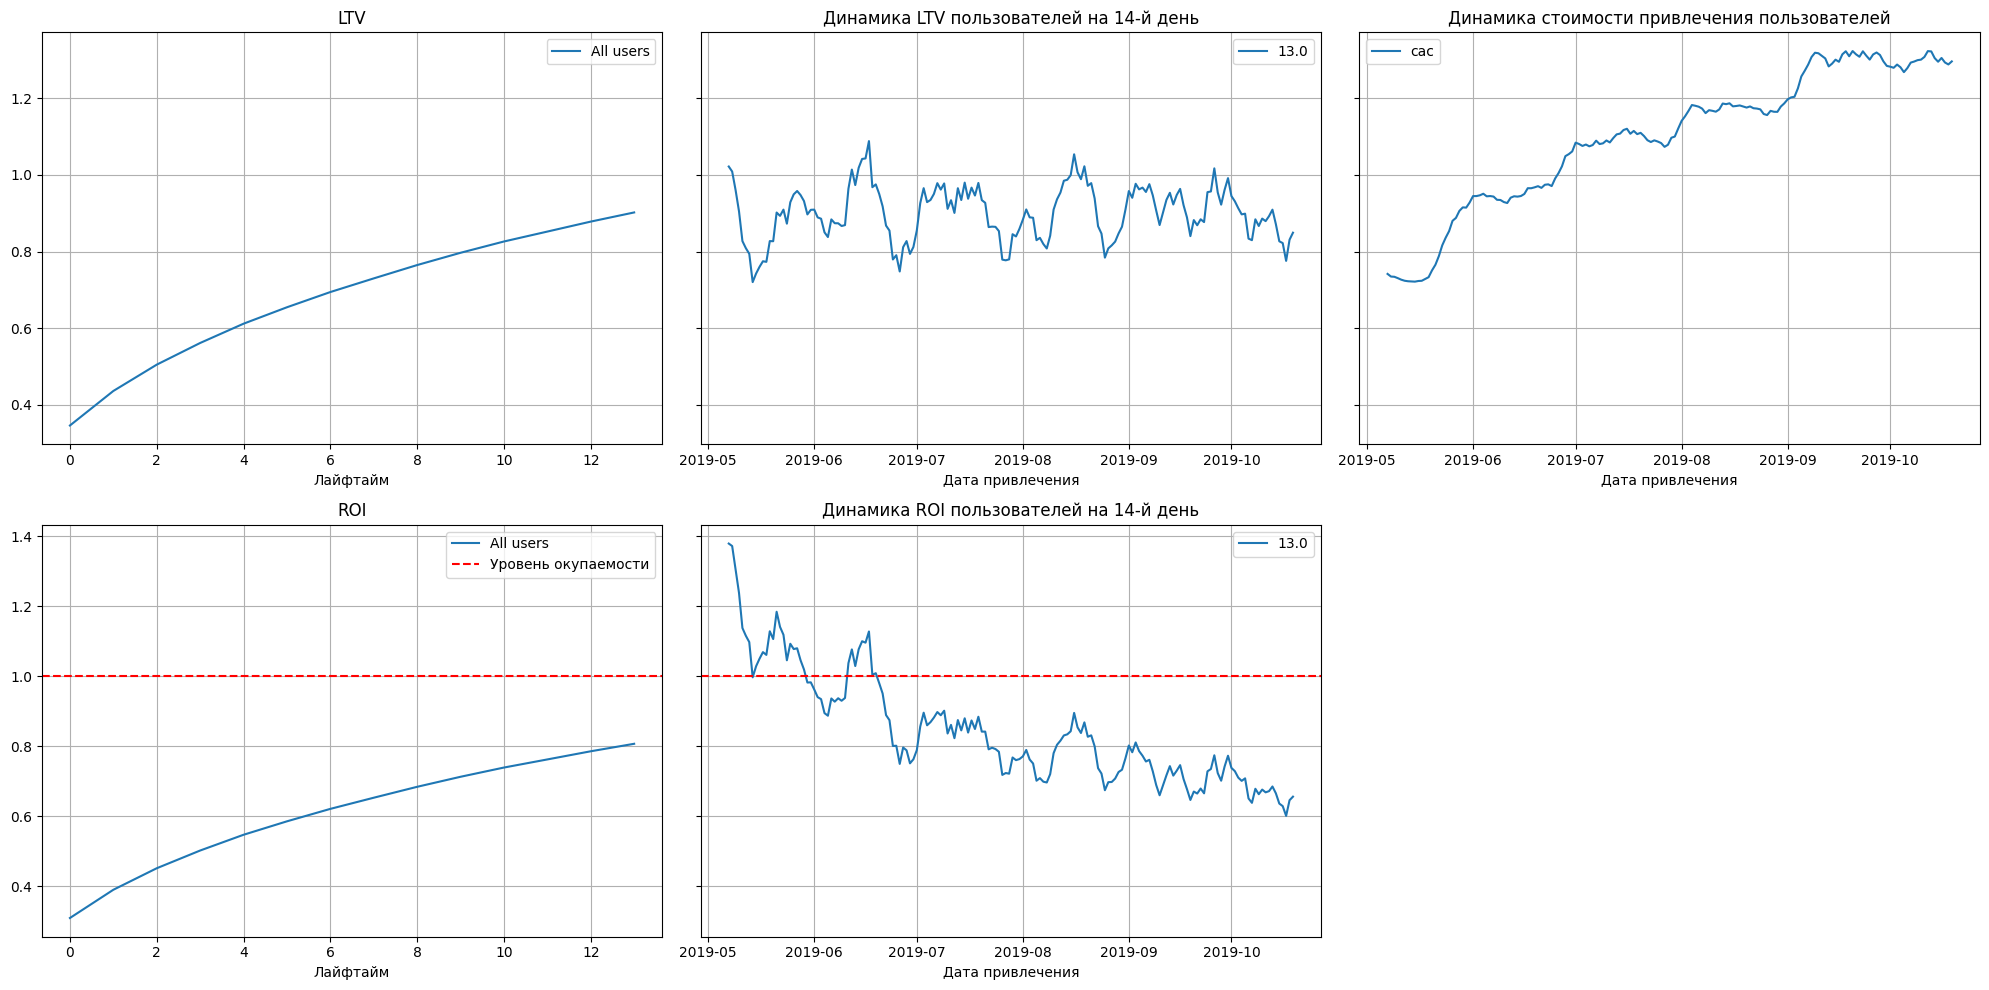

In [42]:
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI
# Посмотрим общую картину - посчитаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

На графике динамики ROI видно, что до конца мая рекламная компания стабильно окупалась, после чего компания стала работать в убыток. Особенно заметно резкое майское падение значения ROI до уровня окупаемости, что было вызвано снижением LTV. Далее значение LTV 14го дня с небольшой цикличностью в среднем держалось примерно на одном уровне, однако значение CAC стремительно росло, что системно приводило к снижению ROI. И как уже стало известно на этапе исследовательского анализа, компания расходует большую часть средств на источники, привлекающие самых дорогих пользователей.

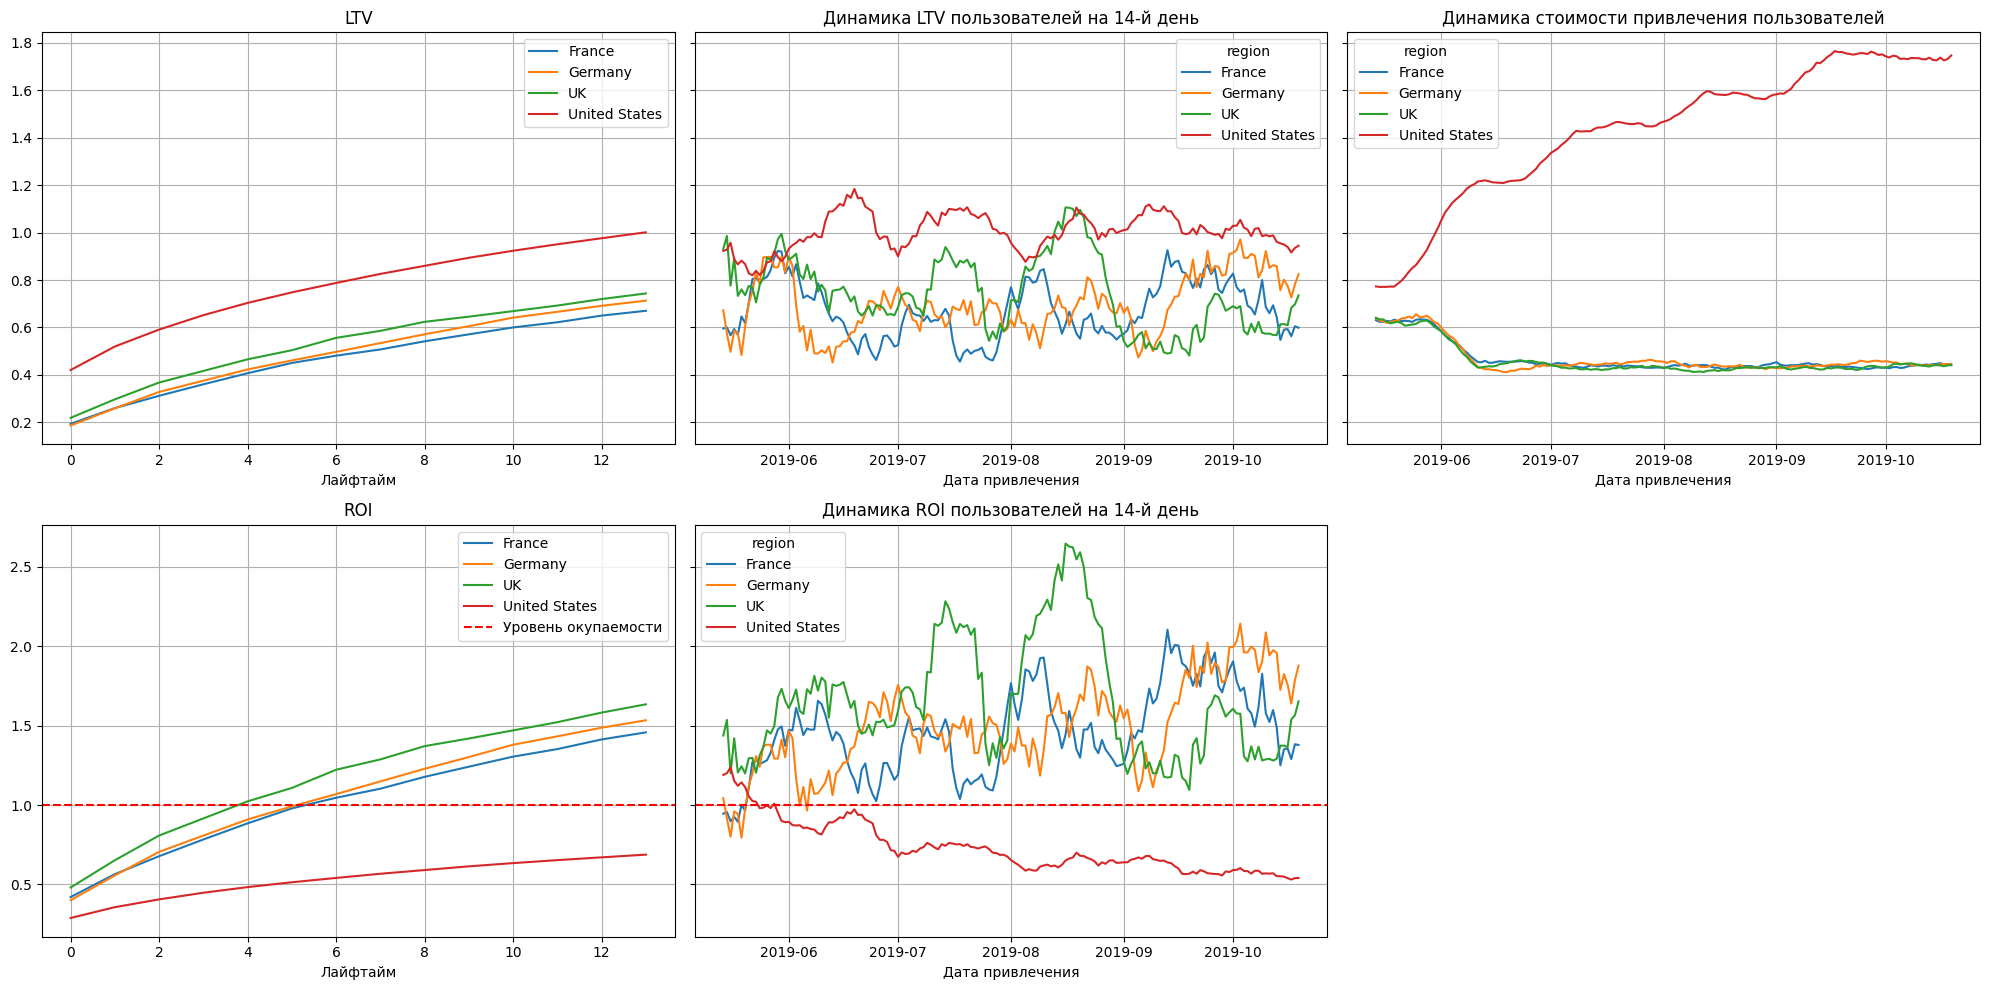

In [43]:
# посмотрим LTV и ROI по регионам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


Пользователи из США имеют наиболее высокий уровень LTV, однако не окупаются, стоимость их привлечения росла в течение всего периода и стала в 3 раза выше. Необходимо посмотреть из каких источников приходят пользователи в данном регионе.

Пользователи из других стран в среднем окупаются на 7-й день (6-й лайфтайм).

In [44]:
# посмотрим из каких источников привлекаются пользователи в разных регионах
visits_grouped = visits.groupby(['region', 'channel']).agg({'user_id':'nunique'})

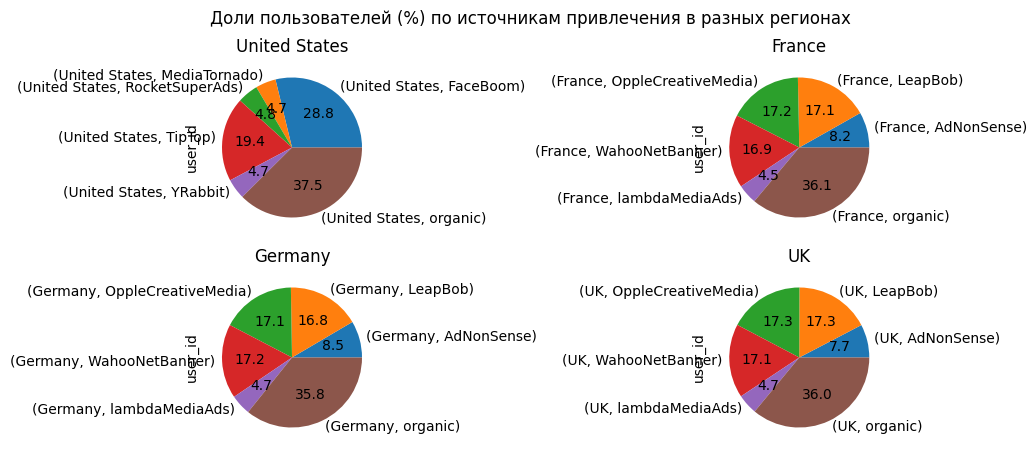

In [45]:
# построим круговые диаграммы
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,5))
visits_grouped.query('region == "United States" ').plot(kind = 'pie', y = 'user_id', ax = axes[0][0], autopct='%.1f', legend=False)
visits_grouped.query('region == "France" ').plot(kind = 'pie', y = 'user_id', ax = axes[0][1], autopct='%.1f', legend=False)
visits_grouped.query('region == "Germany" ').plot(kind = 'pie', y = 'user_id', ax = axes[1][0], autopct='%.1f', legend=False)
visits_grouped.query('region == "UK" ').plot(kind = 'pie', y = 'user_id', ax = axes[1][1], autopct='%.1f', legend=False)
fig.suptitle('Доли пользователей (%) по источникам привлечения в разных регионах')
axes[0][0].set_title('United States')
axes[0][1].set_title('France')
axes[1][0].set_title('Germany')
axes[1][1].set_title('UK')
plt.show()

Теперь мы видим, что почти половина пользователей в США (48.2%) приходят из FaceBoom и TipTop, а это, как уже выяснили, самые дорогие пользователи. Таким образом, именно эти источники влияют на CAC пользователей всего региона.

Также стоит отметить, что доля органических пользователей во всех регионах примерно одинакова, т.е. приложение в равной степени интересно пользователям всех представленных регионов.

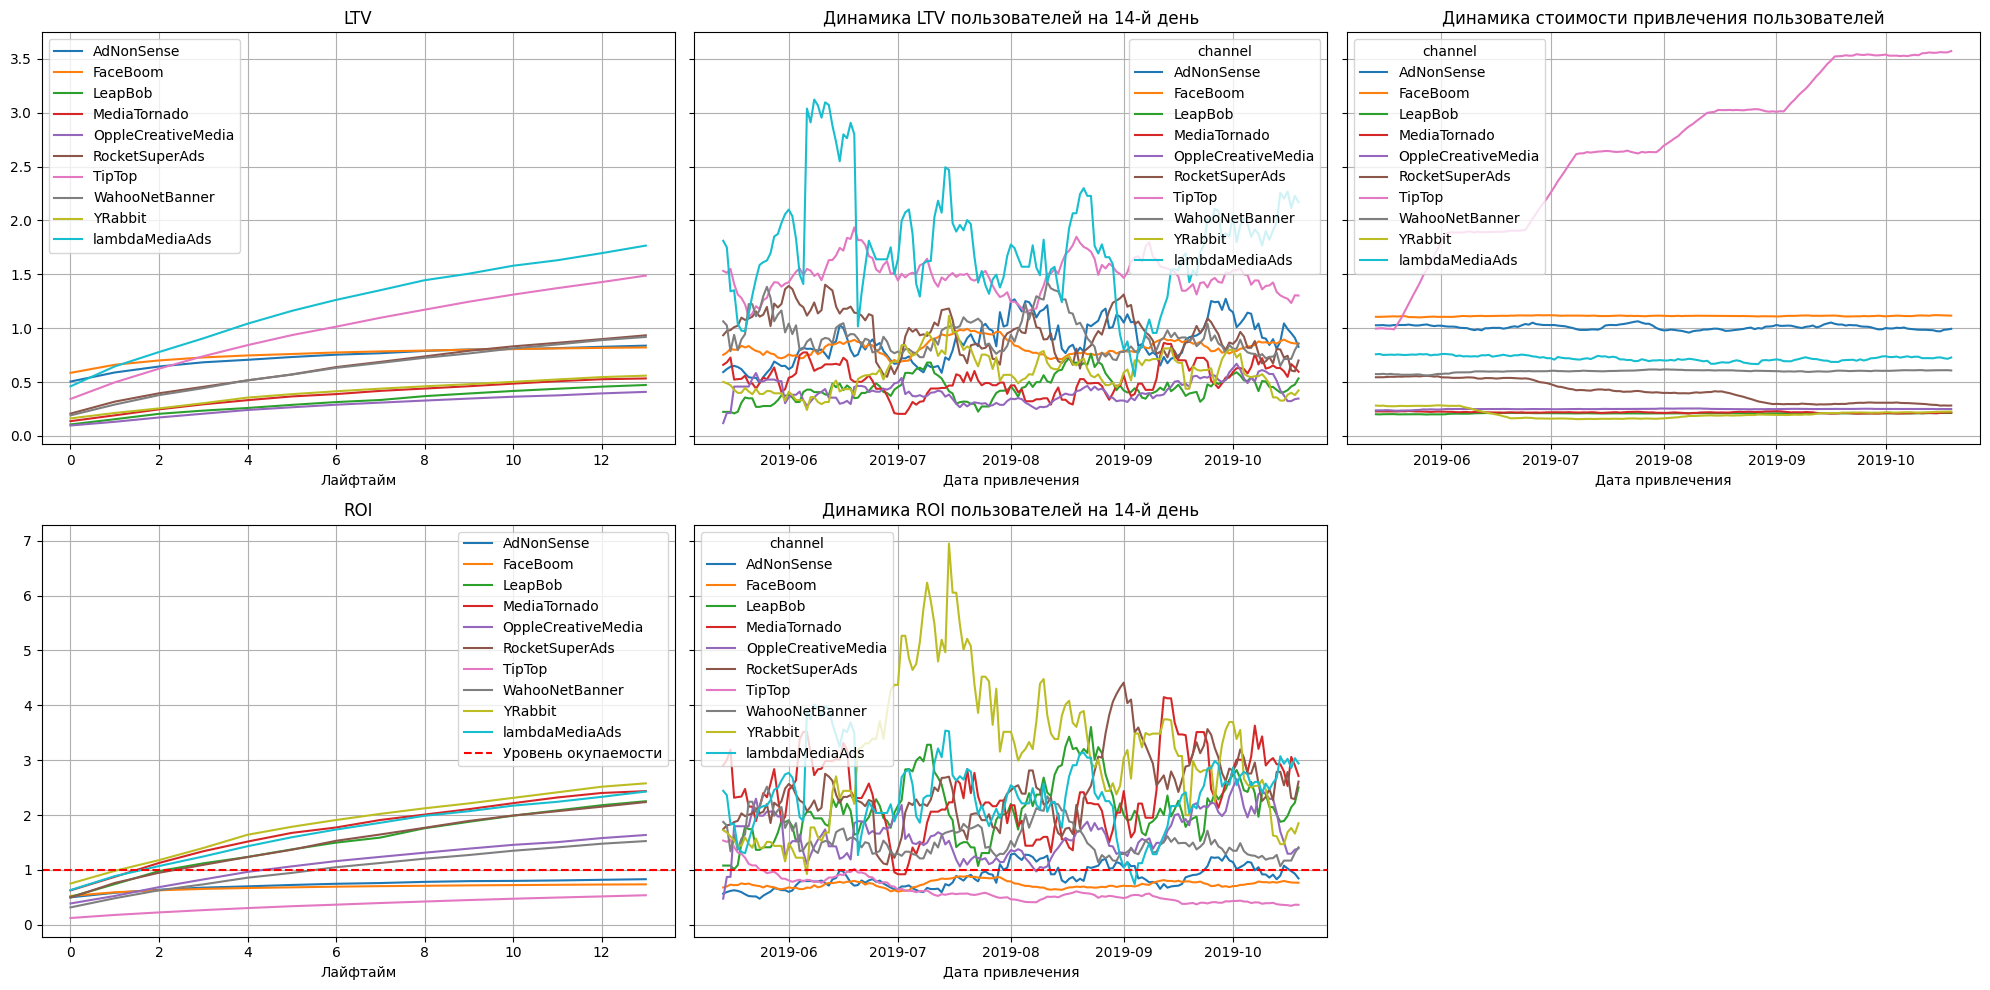

In [46]:
# посмотрим графики LTV и ROI по источникам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

In [47]:
ltv_by_channel = ltv_grouped[[13]].rename(columns={13:'ltv'})
roi_by_channel = roi_grouped[[13]].rename(columns={13:'roi'})

In [48]:
# посмотрим значения ROI 14-го дня для каждого источника
roi_grouped[['cohort_size', 'cac', 13]].rename(columns={13: '14_days_roi'}).sort_values('14_days_roi', ascending=False)

,cohort_size,cac,14_days_roi
channel,,,
YRabbit,4102,0.217087,2.578086
MediaTornado,4167,0.219035,2.436519
lambdaMediaAds,2056,0.727237,2.428712
LeapBob,8103,0.210000,2.252399
RocketSuperAds,4251,0.417431,2.237019
OppleCreativeMedia,8139,0.249908,1.637075
WahooNetBanner,8082,0.601856,1.526304
AdNonSense,3702,1.008023,0.831337
FaceBoom,27544,1.113419,0.737790


Уровень LTV у пользователей, привлеченных из TipTop, высок. Однако помимо динамики увеличения рекламного бюджета на TipTop растет и средняя стоимость привлечения пользователей из этого источника - это ключевой фактор, обусловливающий убытки компании.

Кроме того, не окупаются также и пользователи из каналов FaceBoom и AdNonSense.

5 источников показывают ROI выше 2, то есть привлеченные из них пользователи окупаются больше чем в 2 раза. Лучший показатель у источника YRabbit с ROI 2.58, следом идут MediaTornado, lambdaMediaAds, LeapBob и RocketSuperAds.

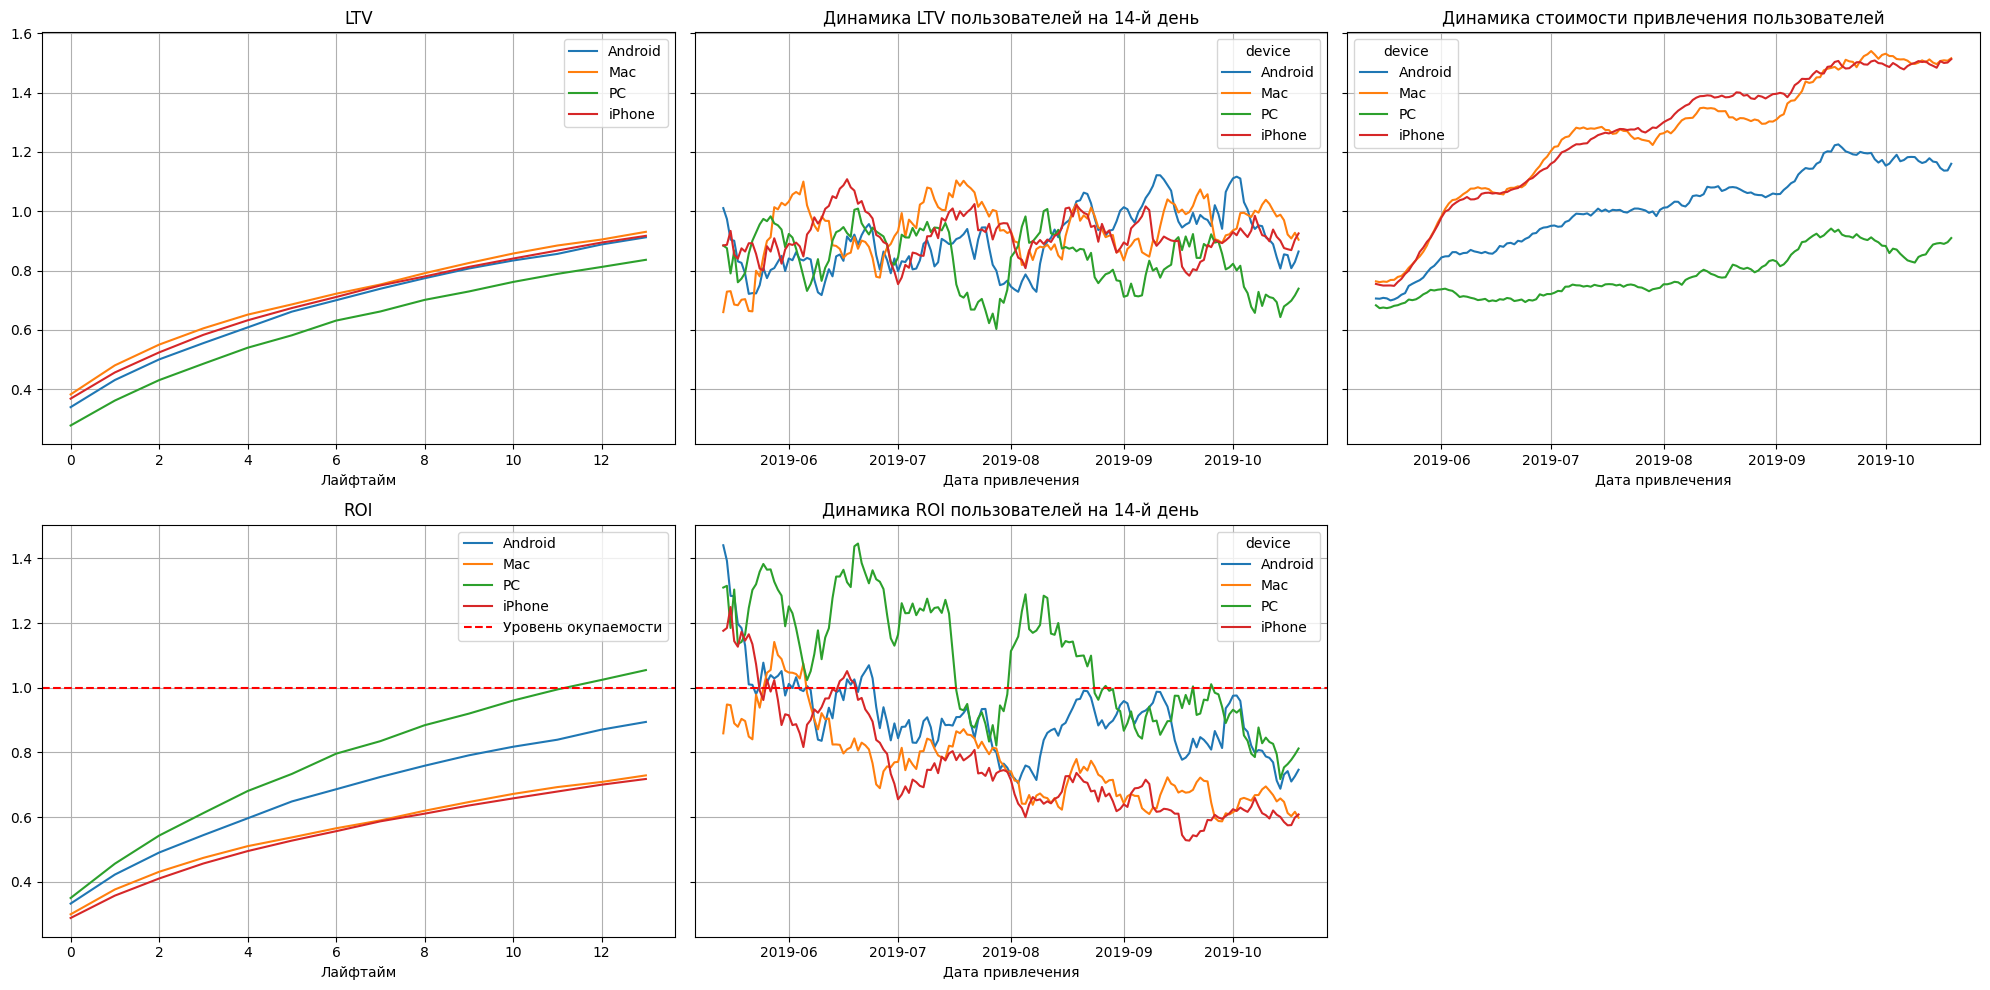

In [49]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

За указанный период в разрезе используемых устройств стоимость привлечения пользователей выросла для каждого из них, в меньшей степени это отразилось на пользователях PC, в то время как пользователи MAC и iPhone подорожали примерно в 3 раза.

У пользователей PC LTV ниже других, однако только они пока еще стабильно окупаются, не смотря на динамику снижения ROI.

Пользователи остальных устройств не окупаются.

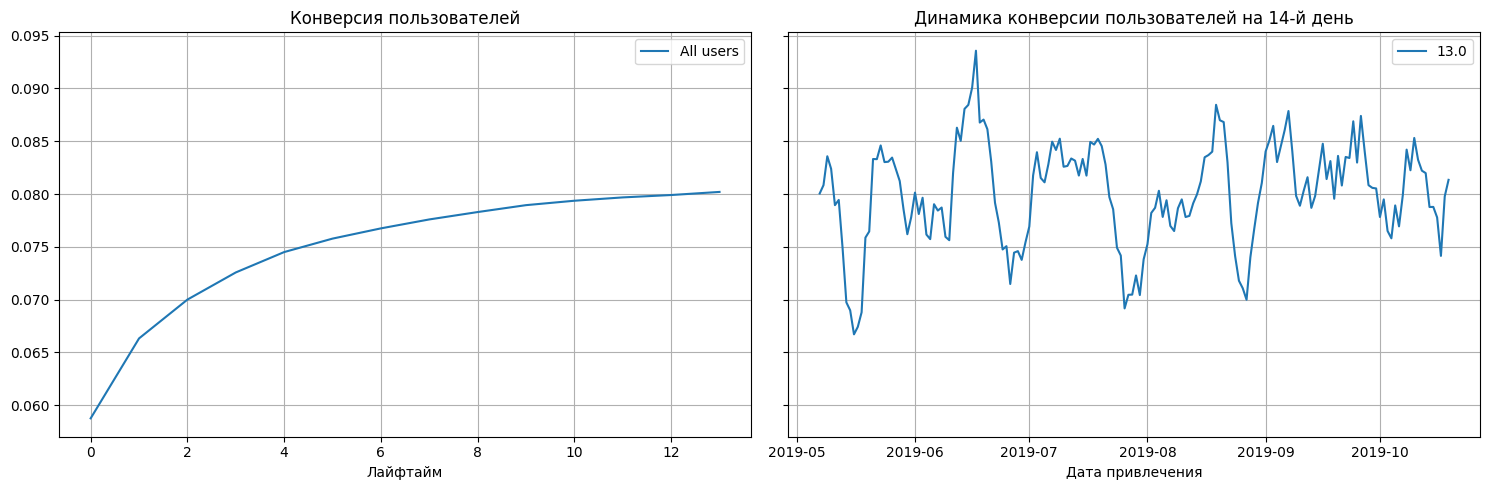

In [50]:
# посмотрим конверсию всех пользователей
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Общая конверсия с июня находится в диапазоне от 0.07 до 0.094, имеет некоторую цикличность, однако нет ярковыраженного тренда на снижение.

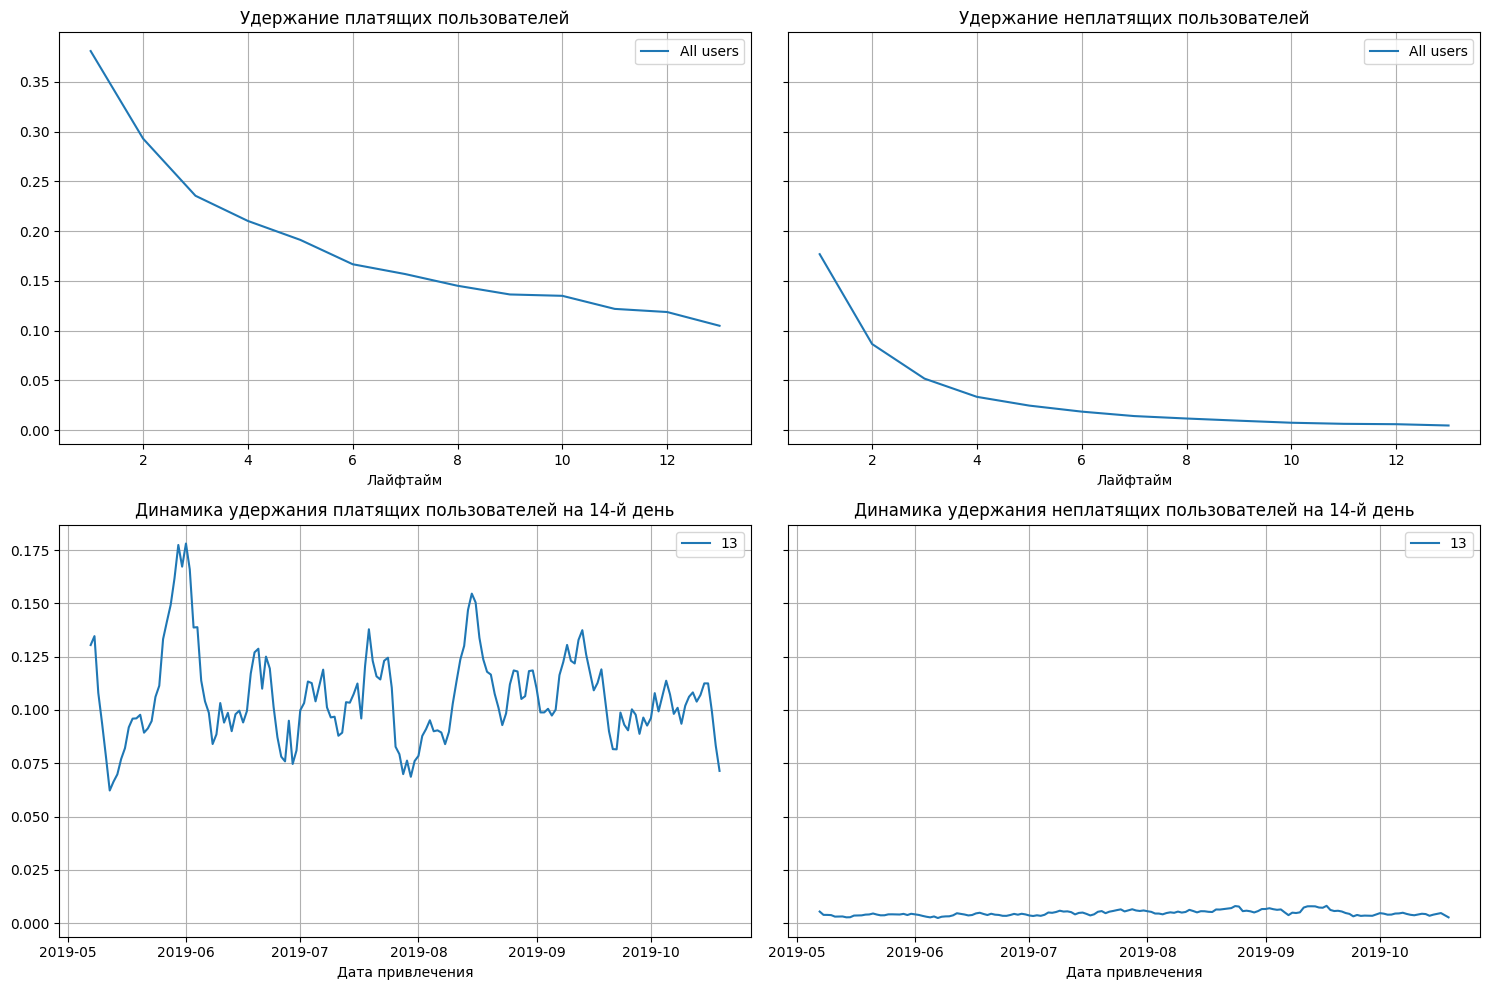

In [51]:
# смотрим удержание всех пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по всем пользователям в течение периода также не имеет явного изменения.

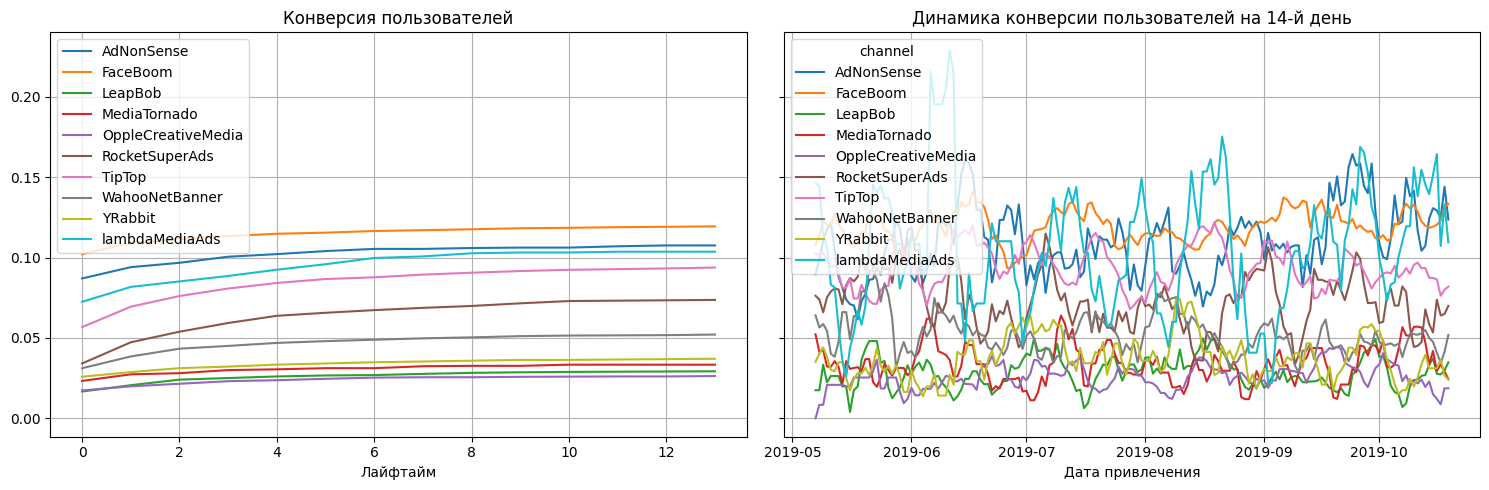

In [52]:
# смотрим конверсию с разбивкой по источникам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

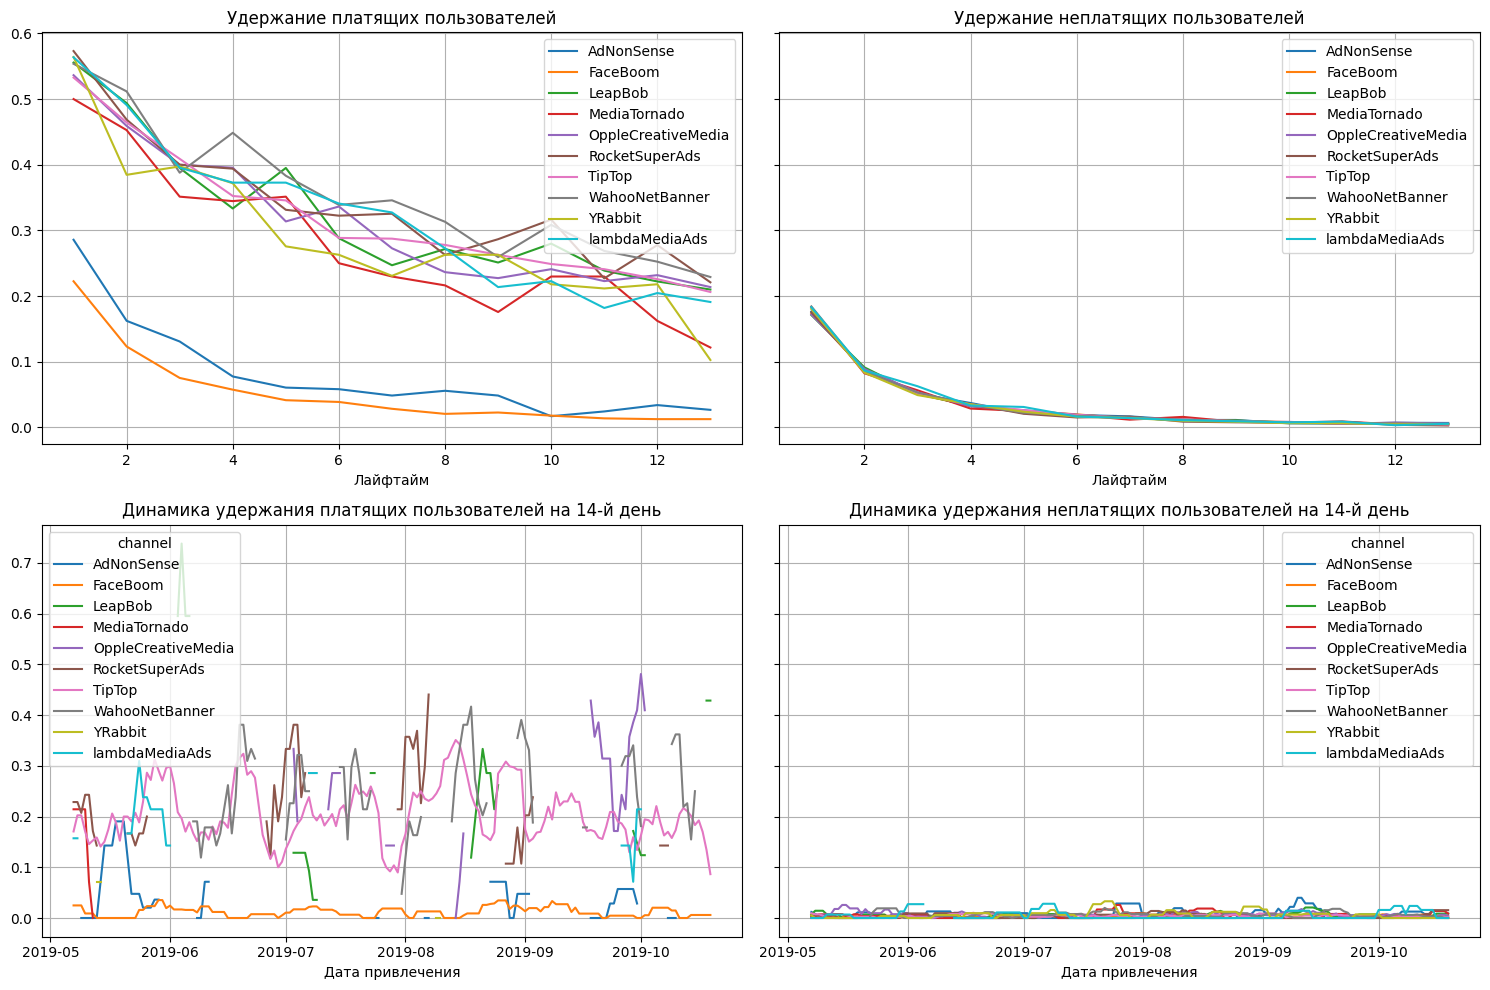

In [53]:
# смотрим удержание с разбивкой по источникам

retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из источников FaceBoom и AdNonSense быстрее остальных конверсятся, однако почти не задерживаются в приложении. Их показатели удержания (Retention) примерно на уровне неплатящих пользователей.

In [54]:
conv_by_channel = conversion_grouped[[13]].rename(columns={13:'conversion'})
ret_by_channel = retention_grouped.query('payer == 1')[[13]].rename(columns={13:'retention'}).droplevel('payer')

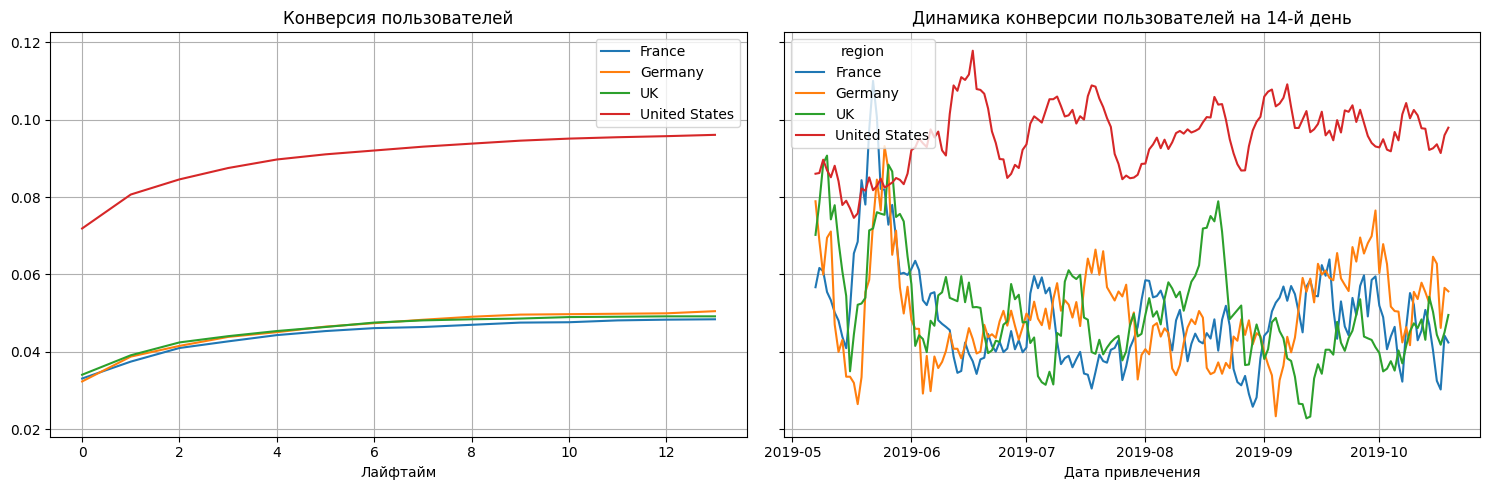

In [55]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

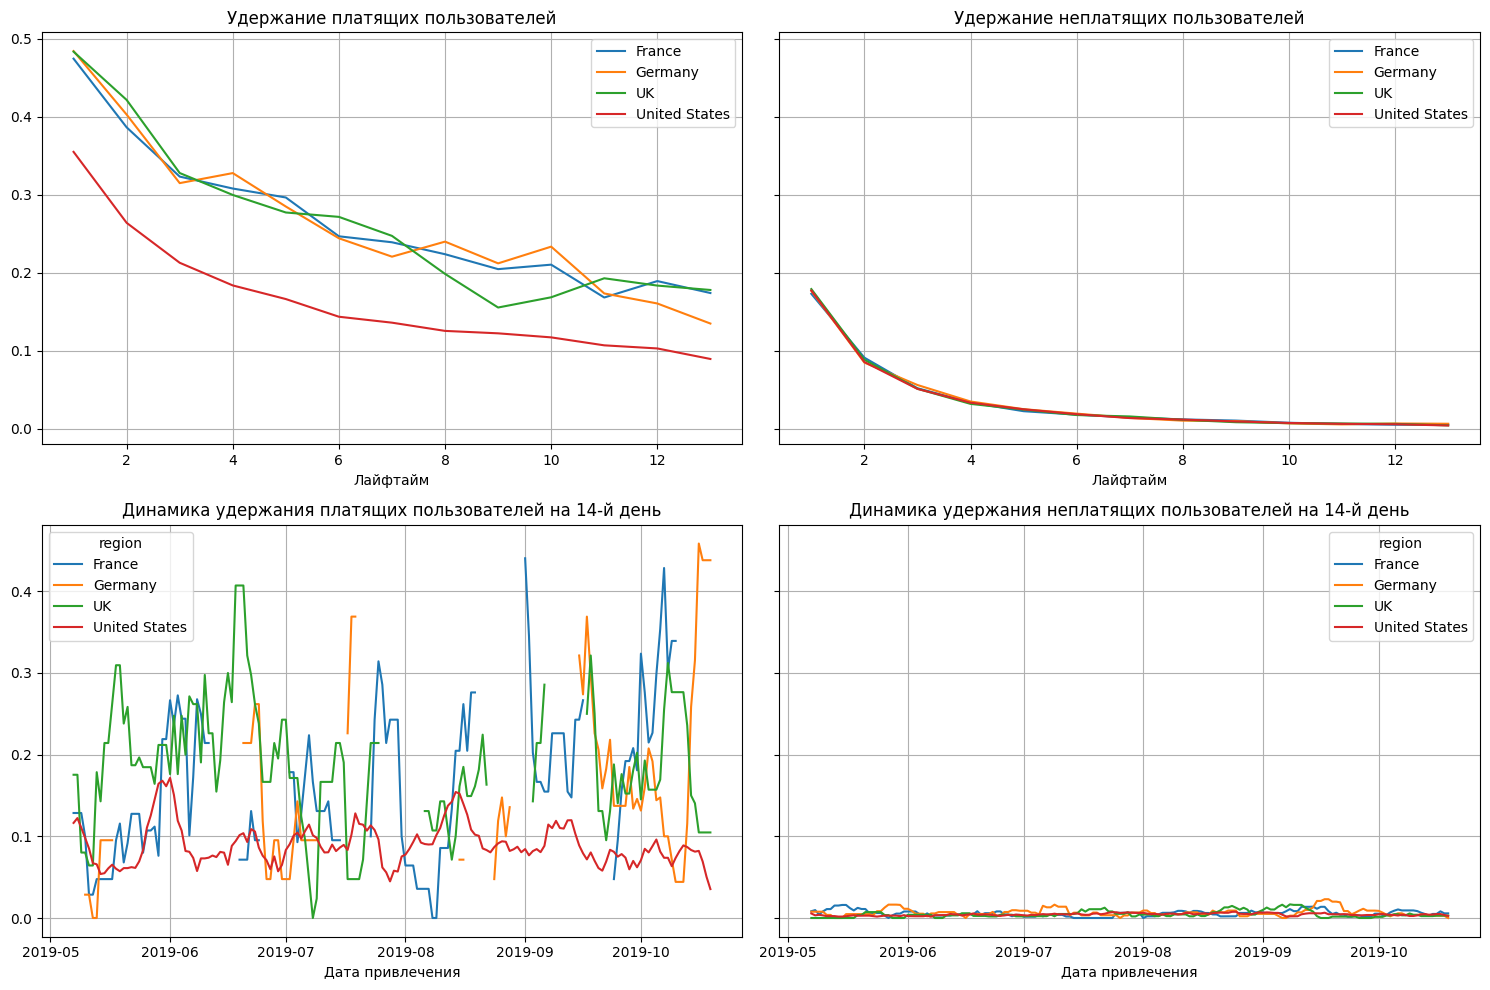

In [56]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США конверсятся значительно быстрее остальных, в то же время они хуже удерживаются. Это пользователи, пришедшие из FaceBoom (46% платных пользователей нашего приложения в США пришли именно из этого источника).

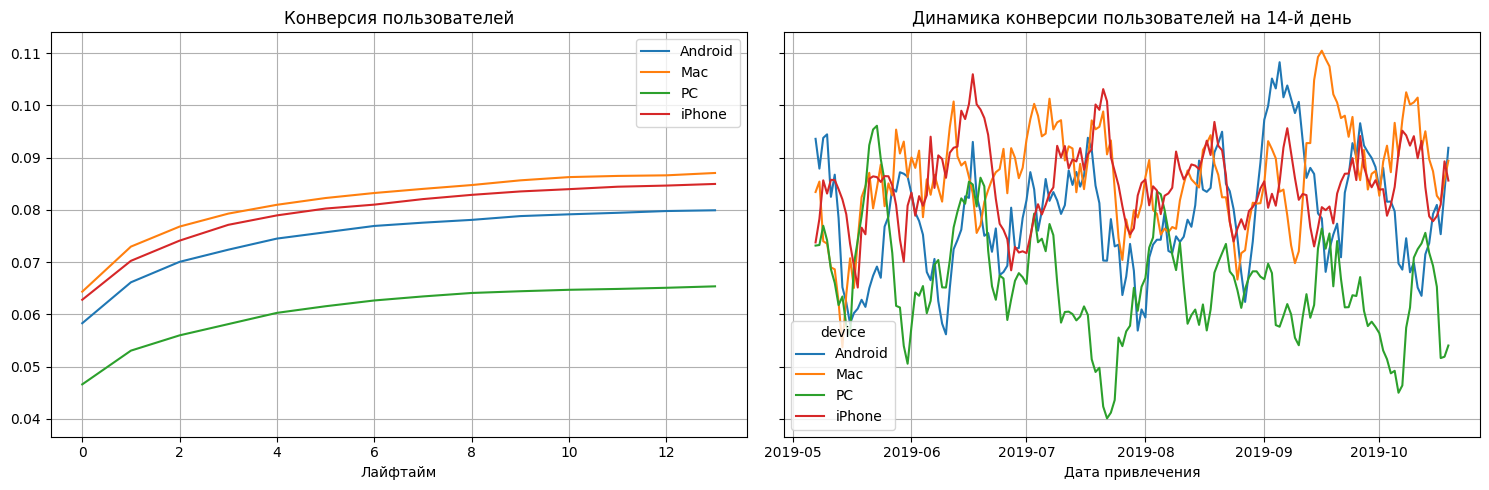

In [57]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

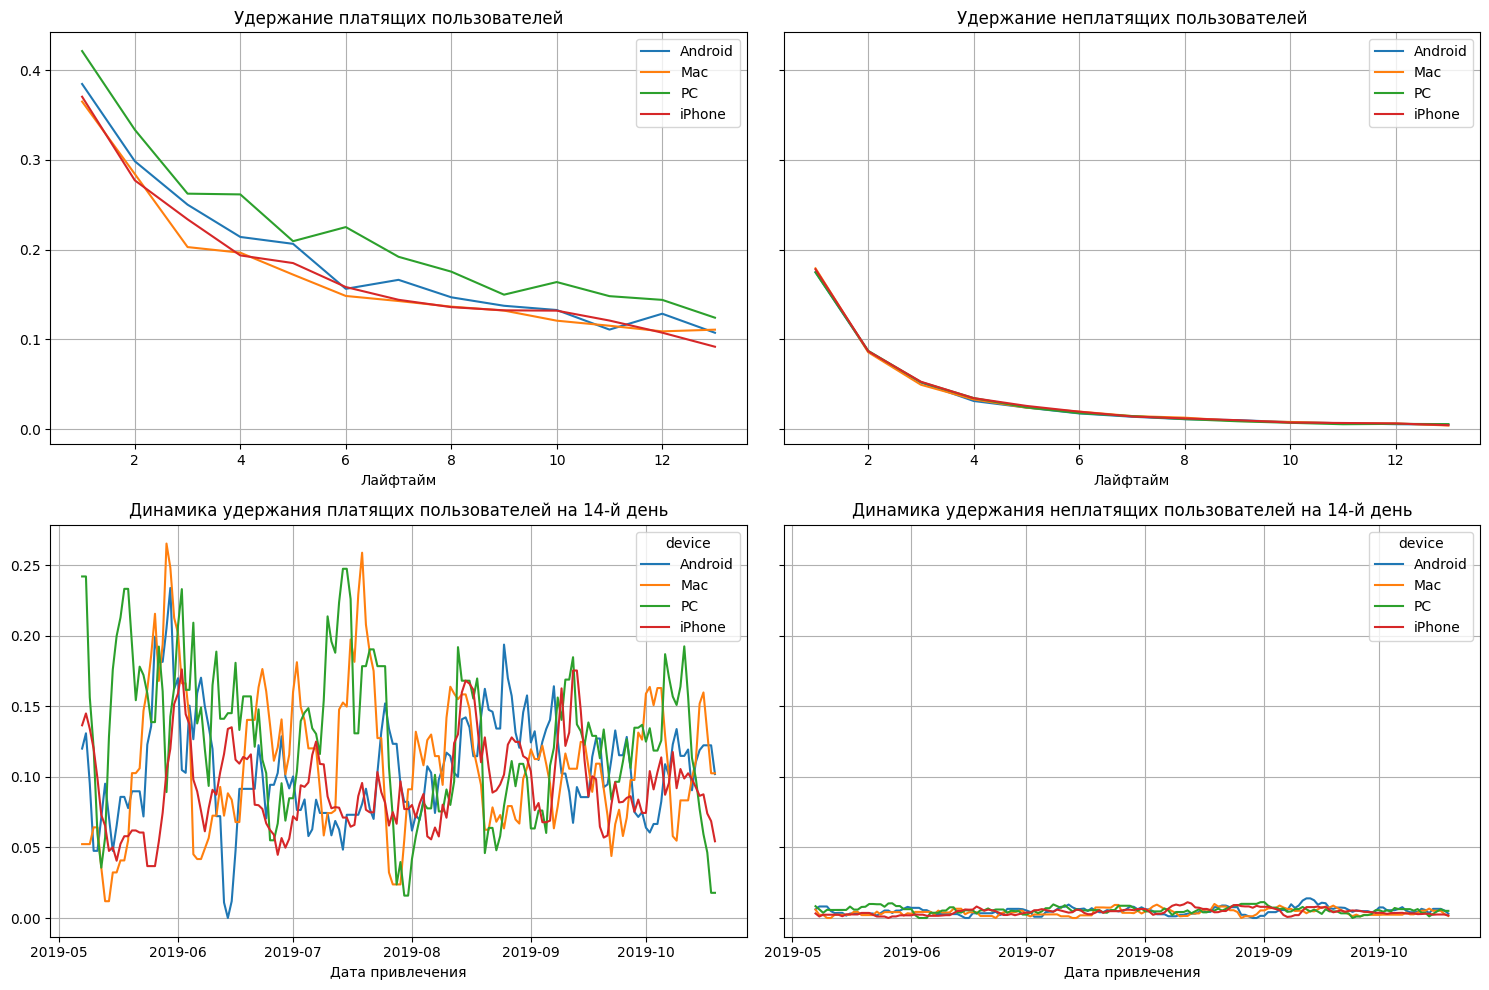

In [58]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи PC имеют показатели конверсии несколько хуже остальных, при этом лучше удерживаются. В целом в удержании каких-либо аномалий в разбивке пользователей по устройствам не выявлено

In [59]:
# построим общую сводную таблицу показателей пользователей из всех источников и сравним
total_channel = (
    users_by_channel.merge(costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs', ascending=False), how='left', on='channel')
                    .merge(cac_by_channel, how='left', on='channel')
                    .merge(ltv_by_channel, how='left', on='channel')
                    .merge(roi_by_channel, how='left', on='channel')
                    .merge(conv_by_channel, how='left', on='channel')
                    .merge(ret_by_channel, how='left', on='channel')
                    .sort_values(['acquisition_cost', 'roi'])
)
total_channel

,total_users,payers,percent_of_payers,costs,acquisition_cost,ltv,roi,conversion,retention
channel,,,,,,,,,
organic,56439,1160,2.1,NaN,0.000000,NaN,NaN,NaN,NaN
LeapBob,8553,262,3.1,1797.60,0.210172,0.473004,2.252399,0.029248,0.209877
MediaTornado,4364,156,3.6,954.48,0.218717,0.533684,2.436519,0.033357,0.121622
YRabbit,4312,165,3.8,944.22,0.218975,0.559668,2.578086,0.037055,0.102564
OppleCreativeMedia,8605,233,2.7,2151.25,0.250000,0.409118,1.637075,0.026293,0.213636
RocketSuperAds,4448,352,7.9,1833.00,0.412095,0.933801,2.237019,0.073630,0.220896
WahooNetBanner,8553,453,5.3,5151.00,0.602245,0.918615,1.526304,0.052091,0.228972
lambdaMediaAds,2149,225,10.5,1557.60,0.724802,1.766250,2.428712,0.103599,0.190909
AdNonSense,3880,440,11.3,3911.25,1.008054,0.838006,0.831337,0.107509,0.026634


### Общие выводы

* За период с мая по октябрь 2019 года рекламный бюджет компании составил 105497.3
* Большинство привлеченных пользователей нашего приложения - Американцы. Также они имеют лучшие показатели конверсии. Исходя из чего компания постоянно увеличивает маркетинговый бюджет в данном регионе на самые популярные источники привлечения: расходы на TipTop выросли в 5 раз (до 500), а в FaceBoom в 2,5 раза (до уровня 250) - это исключительно американские продукты. Однако игнорируется факт роста стоимости привлечения пользователей из TipTop в течение всего периода. Таким образом компания потратила около половины рекламного бюджета на источник с самыми дорогими пользователями (TipTop), стоимость привлечения которых к концу периода превышает среднюю в 4 раза, что приводит к убыткам компании и сказывается на показателях всего региона США.

__Рекомендации для отдела маркетинга__

Для возвращения компании на прежний уровень рентабельности и дальнейшего развития необходимо пересмотреть маркетинговую компанию:
- исключить из источников привлечения основную причину убытков - `TipTop`, что сразу выведет компанию в прибыль. Либо перестроить/оптимизировать рекламу и устранить причину роста стоимости привлечения пользователей.
- обратить внимание на источники `FaceBoom` и `AdNonSense`, которые также не окупаются. Пользователи из данных источников хорошо конверсятся, однако имеют худшие показатели удержания. Кроме того стоимость их привлечения выше остальных (не считая TipTop). В большинстве случаев они совершают покупку в первые дни и больше не возвращаются. Следует также полностью сократить бюджет на данные источники либо разобраться в причинах низкого уровня Retention и повысить его. Вероятно стоит учесть географические особенности данных пользователей: пользователи `FaceBoom` - американцы, а `AdNonSense` - европейцы.
- распределить сэкономленный на вышеуказанных источниках рекламный бюджет на лидеры по показателям ROI:
 * `lambdaMediaAds` - лучший источник в совокупности по показателям конверсии, удержания и ROI. Это может быть хорошей точкой роста при увеличении рекламного бюджета.
 * `RocketSuperAds` - второй источник с хорошими показателями ROI, конверсии и удержания.
 * `LeapBob` и `WahooNetBanner` - пользователи из данных источников показывают высокие показатели удержания, т.е. уровень интереса к приложению, а также хорошо окупаются, хотя по показателям конверсии уступают источникам из предыдущих пунктов.